# Multiple clasification

In [1]:
import numpy as np
from keras import layers, models
from keras.datasets import reuters

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [3]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [4]:
word_index = reuters.get_word_index()
word_index = dict([(value, key) for (key, value) in word_index.items()])

for _ in train_data[0]:
    print(word_index.get(_ - 3))

565248/550378 [==============================] - 0s 0us/step
None
None
None
said
as
a
result
of
its
december
acquisition
of
space
co
it
expects
earnings
per
share
in
1987
of
1
15
to
1
30
dlrs
per
share
up
from
70
cts
in
1986
the
company
said
pretax
net
should
rise
to
nine
to
10
mln
dlrs
from
six
mln
dlrs
in
1986
and
rental
operation
revenues
to
19
to
22
mln
dlrs
from
12
5
mln
dlrs
it
said
cash
flow
per
share
this
year
should
be
2
50
to
three
dlrs
reuter
3


In [5]:
train_labels[0]

3

In [6]:
train_data.shape  # train_data is not a vector

(8982,)

In [7]:
## Text vectorization
def vectorization(sequences, dim=10000):
    results = np.zeros((len(sequences), dim))
    for i, sequences in enumerate(sequences):
        results[i, sequences] = 1
    return results

In [8]:
x_train = vectorization(train_data)
x_test = vectorization(test_data)

In [9]:
train_labels[0]

3

We have to use one-hot encoding

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [12]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

The SOFTMAX activation function gets along very well with multiple classification, because it gives you back the probabilities of each output no matter how many classes there are. This is where it differs from the SIGMOID function, which is very useful for binary classification.

In [13]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [14]:
model.compile(optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [15]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

## Training the model

In [16]:
history = model.fit(partial_x_train, partial_y_train,
    epochs=9,
    batch_size=512,
    validation_data=(x_val, y_val))

Epoch 1/9
16/16 [==============================] - 5s 165ms/step - loss: 2.7808 - accuracy: 0.4885 - val_loss: 1.7594 - val_accuracy: 0.6570
Epoch 2/9
16/16 [==============================] - 2s 110ms/step - loss: 1.4228 - accuracy: 0.7243 - val_loss: 1.3106 - val_accuracy: 0.7210
Epoch 3/9
16/16 [==============================] - 2s 99ms/step - loss: 1.0352 - accuracy: 0.7917 - val_loss: 1.1322 - val_accuracy: 0.7710
Epoch 4/9
16/16 [==============================] - 1s 86ms/step - loss: 0.8139 - accuracy: 0.8315 - val_loss: 1.0344 - val_accuracy: 0.7790
Epoch 5/9
16/16 [==============================] - 1s 60ms/step - loss: 0.6496 - accuracy: 0.8634 - val_loss: 0.9885 - val_accuracy: 0.7860
Epoch 6/9
16/16 [==============================] - 1s 61ms/step - loss: 0.5217 - accuracy: 0.8925 - val_loss: 0.9229 - val_accuracy: 0.8040
Epoch 7/9
16/16 [==============================] - 1s 61ms/step - loss: 0.4213 - accuracy: 0.9113 - val_loss: 0.8805 - val_accuracy: 0.8190
Epoch 8/9
16/16 [=

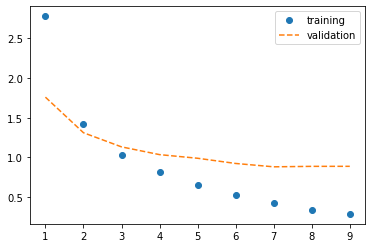

In [17]:
## Loss values in every epoch
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epoch = range(1, len(loss_values) + 1)
plt.plot(epoch, loss_values, 'o', label='training')
plt.plot(epoch, val_loss_values, '--', label='validation')
plt.legend()
plt.show()

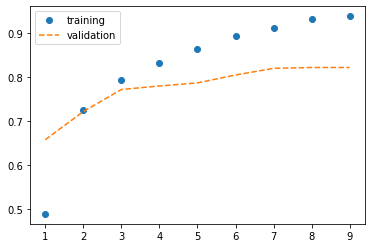

In [18]:
## Accuracy values 
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']

epoch = range(1, len(loss_values) + 1)
plt.plot(epoch, accuracy_values, 'o', label='training')
plt.plot(epoch, val_accuracy_values, '--', label='validation')
plt.legend()
plt.show()

In [19]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 5ms/step - loss: 0.9784 - accuracy: 0.7965


[0.978421688079834, 0.7965271472930908]

In [20]:
predictions = model.predict(x_test)

In [21]:
predictions[0]

array([8.9700054e-04, 9.1795134e-04, 5.1270723e-05, 6.1617649e-01,
       3.1885794e-01, 5.2053021e-04, 5.1510800e-03, 1.7775327e-04,
       1.2427687e-02, 3.6647843e-04, 8.6499749e-05, 4.7363122e-03,
       8.1652263e-04, 1.1800642e-03, 9.7895056e-05, 5.7868275e-04,
       1.4004771e-03, 1.3788416e-04, 1.3025137e-04, 6.5047885e-03,
       9.5188720e-03, 4.3778185e-04, 1.9891614e-04, 5.0399534e-04,
       1.7416000e-04, 7.7327312e-04, 6.0486102e-05, 3.2269745e-03,
       1.3443016e-03, 1.1606511e-03, 1.8563237e-03, 2.7954023e-04,
       1.1386493e-03, 9.6172771e-05, 1.6739862e-03, 8.3444313e-05,
       9.2428894e-04, 7.9679373e-04, 1.9652332e-04, 1.6828274e-03,
       6.2374573e-04, 5.3470378e-04, 5.5660849e-04, 6.2143488e-04,
       3.2037497e-05, 2.9008641e-04], dtype=float32)

In [22]:
np.sum(predictions[0])

1.0000001

In [23]:
np.argmax(predictions[0])  # Returns the indices of the maximum values along

3